# Background Info

We look at how we can improve the linear model by replacing least squares with some alternative fitting procedures. Alternative fitting procedures can increase prediction accuracy and model interpretability. 

Least squares performs best when $n \gg p$. When n is not much larger than p, there can be a lot of variability in the least squares fit and if p is greater than n, there is not a unique least squares solution. 

Least squares is also unlikely to yield any coefficient estimates that are exactly 0, but models can benefit from removing irrelevant variables. We look at methods for feature selection in this chapter. 

There are three classes of methods that are alternatives to least squares:
* **Subset Selection**: Identifying a subset of the p predictors that we believe to be related to the response, and then we fit a model using least squares on the reduced set of variables
* **Shrinkage**: This approach involves fitting a model involving all p predictors, but the estimated coefficients are shrunken towards 0. This shrinkage (also known as regularization) has the effect of reducing variance. Some coefficients may be estimated to be exactly zero, so it can also perform variable selection
* **Dimension Reduction**: This approach involves projecting the p predictors into an M dimensional subspace where $ M < p $. This is achieved by computing M different linear combinations or projections, and then these M projections are used as predictors to fit a linear regression model by least squares

## Subset Selection

### Best Subset Selection
We fit a least squares regression for each possible combination of the p predictors. We then look at all of the resulting models with the goal of identifying which one that is the best, generally in terms of test error. 

**Algorithm**
1. Let $\mathcal{M}_0$ denote the null model, which contains no predictors. This model simply guesses the sample mean for each observation
2. For $k = 1, 2, ..., p$
  1. Fit all $\binom{p}{k}$ models that contain exactly k predictors
  2. Pick the best among these models and call it $\mathcal{M}_k$. Best is defined as having the smallest RSS or largest $R^2$
3. Select the single best model from $\mathcal{M}_0, ..., \mathcal{M}_p$ using its cross-validation score

The downside of best subset selection is that it can be computationally expensive. 

### Stepwise Selection

#### Forward Stepwise Selection
Forward stepwise selection begins with a model with no predictors and then adds predictors to the model one at a time until all of the predictors are in the model. At each step, the variable that gives the greatest additional improvement to the fit (smallest RSS or highest $R^2$) is added to the model.

**Algorithm**
1. Let $\mathcal{M}_0$ denote the null model, which contains no predictors. This model simply guesses the sample mean for each observation
2. For $k = 0, ..., p-1$
  1. Consider all $p-k$ models that augment the predictors in $\mathcal{M}_k$ with one additional predictor
  2. Pick the best among these models and call it $\mathcal{M}_{k+1}$. Best is defined as having the smallest RSS or largest $R^2$
3. Select the single best model from $\mathcal{M}_0, ..., \mathcal{M}_p$ using its cross-validation score

This method can be used even when $ n < p $. This method does well in practice, but it is not guaranteed to find the best model out of all possible models.

#### Backward Stepwise Selection
Unlike forward selection, it starts with the full least squares model containing all p predictors and then iteratively removes the least useful predictor one at a time. 

**Algorithm**
1. Let $\mathcal{M}_p$ denote the full model, which contains all of the predictors. 
2. For $k = p, p-1, ... 1$
  1. Consider all $k$ models that contain all but one of the predictors in $\mathcal{M}_k$, for a total of $k-1$ predictors
  2. Pick the best among these models and call it $\mathcal{M}_{k-1}$. Best is defined as having the smallest RSS or largest $R^2$
3. Select the single best model from $\mathcal{M}_0, ..., \mathcal{M}_p$ using its cross-validation score

Backwards selection requires that the number of samples n is larger than the number of variables p. 

### Choosing the Best Model

Aside from the cross-validation score, we could also consider alternative measurements

The $C_p$ statistic penalizes the training RSS in order to adjust for the fact that the training error tends to underestimate the test error. For a fitted least squares model containing d predictors, the $C_p$ estimate of the test MSE is computed using the equation
$ C_p = \frac{1}{n}(RSS + 2d\hat{\sigma}^2) $ where $\hat{\sigma}^2$ is an estimate of the variance of the error associated with each response measurement. 

The AIC (Akaike Information Criterion) is defined for a large class of models fit by maximum likelihood. $C_p$ and $AIC$ are proportional to each other. 

The BIC (Bayesian Information Criterion) for a least squares model with d predictors is given by: $BIC = \frac{1}{n\hat{\sigma}^2}(RSS + log(n)d\hat{\sigma}^2) $. The BIC statistic generally places a heavier penalty on models with many variables, and hence results in the selection of smaller models than $C_p$. 

Adjusted $R^2$ is another popular approach for selecting among models with different numbers of variables. Adjusted $R^2 = 1 - \frac{RSS/(n-d-1)}{TSS/(n-1)}$. In this case, a large value of adjusted $R^2$ indicates a model with less test error. Unlike the $R^2$ statistic, this one pays a price for the inclusion of unnecessary variables in the model. However, the adjusetd $R^2$ is not as well motivated in statistical theory as is AIC, BIC, and $C_p$. 

#### Cross-Validation

An alterative to the approaches above would be to directly estimate test error. The benefit is that it makes fewer assumptions about the true underlying model and it can be used for any model.

However, sometimes the cross-validation score is similar among the best candidates. In this setting, we can select a model using the *one-standard-error* rule. We first calculate the standard error of the estimated test MSE for each model size and then select the smallest model for which the estimated test error is within one standard error of the lowest point on the curve. The rationale is that if a set of models appear to be or more less equally good, we should choose the simplest model. 

## Shrinkage Methods

As an alternative, we can fit a model containing all p predictors using a technique that constrains or regularizes the coefficient estimates, or equivalently, that shrinks the coefficient estimates to 0. This method reduces the variance of the coefficient estimates. The two best-known techniques for shrinking the regression coefficients towards zero are ridge regression and lasso.

### Ridge Regression

Ridge regression is similar to least squares, except that the coefficients are estimated by minimizing a slightly different quantity. The ridge regression coefficient estimates $\hat{\beta}^R$ are the values that minimize: 

$$ \sum_{i=1}^n(y_i - \beta_0 - \sum_{j=1}^p\beta_jx_{ij})^2 + \lambda\sum_{j=1}^p\beta_j^2 = RSS + \lambda\sum_{j=1}^p\beta_j^2 $$

where $\lambda \ge 0$ is a tuning parameter. Ridge regression aims to fit the data well, by making the RSS small, but the second term, called the *shrinkage penalty* is small when $\beta_1,...,\beta_p$ are close to 0, so it has the effect of shrinking the coefficients towards 0. The tuning parameter serves to control the relative impact of these two terms on the regression coefficient estimates. 

Measuring how much the coefficients have not been shrunken:

$$ \frac{\|\hat{\beta}_{\lambda}^R\|_2}{\|\hat{\beta}\|_2} $$

where $\|\beta\| = \sqrt{\sum_{j=1}^p \beta_j^2}$. This quantity ranges from 1 (when $\lambda = 0$) to 0 (when $\lambda = \infty$). Thus this value is small when they have been shrunken very close to 0. 

The least squares coefficient estimates are scale-invariant, but this is not the case with ridge regression. Therefore, it's best to standarize the predictors before applying ridge regression. 

$$ \tilde{x_{ij}} = \frac{x_{ij}}{\sqrt{\frac{1}{n}\sum_{i=1}^n(x_{ij}-\bar{x}_j)^2}} $$

Note that the denominator is the estimated standard deviation of the *j*th predictor, and the standardized predictors will all have a standard deviation of one. 

As $\lambda$ increases, the flexibility of the fit decreases, which results in lower variance but increased bias. Ridge regression works best in situations where the least squares estimates have high variance, such as if p is large in relation to n. 

### Lasso
Unlike with subset selection, ridge regression will include all p predictors in the final model. The penalty $\lambda\sum\beta_j^2$ will shrink the coefficients *towards* zero, but it won't set any of them exactly to zero unless $\lambda=\infty$. It can create a challenge in model interpretability, especially if p is large. 

In contrast, the lasso coefficients $\hat{\beta}_\lambda^L$ minimize the quantity:
$$ \sum_{i=1}^n\bigg( y_i-\beta_0-\sum_{j=1}^p\beta_jx_{ij}\bigg)^2 + \lambda\sum_{j=1}^p|\beta_j| = RSS + \lambda\sum_{j=1}^p|\beta_j|$$

With sufficiently large $\lambda$, some coefficients can be set exactly to 0, so the lasso performs feature selection. 

### Lasso vs. Ridge Regression
Ridge regression will perform better than lasso when none of the true coefficients equal zero. Lasso will perform better when some of the true coefficients are equal to zero. In general, lasso may perform better in a setting where a relatively small number of predictors have substantial coefficients, and ridge regression may perform better when the response is a function of many predictors, all with coefficients of roughly equal size.

### Selecting the Tuning Parameter

Cross-validation provides a simple way to select the best tuning parameter. 

## Dimension Reduction Methods

We now explore a class of approaches that transform the predictors and then fit a least squares model using the transformed variables. 

Let $Z_1, Z_2, ..., Z_M$ represent $M < p$ linear combinations of our original p predictors. 

$$ Z_m = \sum_{j=1}^p \phi_{jm}X_j $$

for some constants $\phi_{1m}, \phi_{2m}, ..., \phi{pm}$. We can then fit the linear regression model:

$$ y_i = \theta_0 + \sum_{m=1}^M \theta_mz_{im} + \epsilon_i $$

where $i = 1,...,n$. The regression coefficients are thus given by $\theta_0, ..., \theta_M$. Hence we have $\beta_j = \sum_{m=1}^M \theta_m\phi_{jm}$

In the case where p is large relative to n, selecting a value $M \ll p$ can significantly reduce the variance of the fitted coefficients. 

### Principal Components Regression
Principal Component Analysis (PCA) is a popular approach for dimensionality reduction. 

The first principal component is that direction of the data for which the observations vary the most. The idea is that out of every possible linear combination such that $\phi_{11}^2+\phi_{21}^2 = 1$, this particular linear combination yields the highest variance. 

In general, one can construct up to p principal components. The second principal component $Z_2$ is a linear combination of the variables that is uncorrelated with $Z_1$ and has the largest variance subject ot this constraint.

The principal components regression (PCR) approach involves constructing M principal components and then using these components as predictors in a linear regression model. It assumes that the directions in which $X_1, ..., X_p$ show the most variation are the directions that are associated with Y. This approach can lead to a better fit since it can mitigate overfitting. 

PCR tends to do well when the first few principal components are sufficient to capture most of the variation in the predictors as well as the relationship with the response. 

PCR does not perform feature selection, and it's closely related to ridge regression. 

It also recommended to standardize the features before performing PCR, since high-variance variables will tend to play a larger role in the principal components obtained. 

### Partial Least Squares
PCR potentially suffers from the fact that there is no guarantee that the directions that best explain the predictors will also be the best directions for predicting the response. 

Partial Least Squares is a supervised alternative to PCR, which makes use of the response Y in order to identify new features that not only approximate the old features, but also are related to the response. 

However, in practice, it often performs no better than PCR or ridge regression. 

## Considerations in High Dimensions

### High-Dimensional Data
Data sets containing more features than observations are often referred to as high-dimensional. For regression, subset selection, ridge regression, the lasso, and principal components regression are all particularly useful in the high-dimensional setting. The inclusion of non-relevant features will likely decrease the test error, as it can cause overfitting. And sometimes, even if they are relevant, the variance incurred in fitting their coefficients may outweigh the reduction in bias that they bring

#### Interpreting the Results in High Dimensions
In the high-dimensional setting, the problem of multicollinearity is extreme. Any variable in the model can be written as a linear combination of all the other variables in the model. This means that we can never know exactly which variables are truly predictive of the outcome. When we obtain a model, we must make it clear that what we have identified is simply one of many possible models for predicting the response. 

# Labs

## Subset Selection Methods

### Best Subset Selection

Here, we will apply the best subset selection approach to the `Hitters` data. We wish to predict a baseball player's `Salary` on the basis of various statistics associated with performance in the previous year

We also note that the `Salary` variable is missing for some players. We will remove the rows where the `Salary` variable is missing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hitters = pd.read_csv('Data/hitters.csv')
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [6]:
hitters.shape

(322, 21)

In [7]:
hitters = hitters.dropna(subset=['Salary'])
hitters.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [8]:
# 59 players had no salary data
hitters.shape

(263, 21)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations

In [18]:
LinearRegression(fit_intercept=True).fit(X, y).coef_

array([0.])

In [60]:
def best_subset_selection(X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    results_df = pd.DataFrame([], columns=['Number of Features', 'Features', 'RSS', 'Test Score'])
    # Null Model
    y_pred = np.repeat(np.mean(y), len(y))
    RSS = mean_squared_error(y, y_pred) * len(y)
    test_score = mean_squared_error(y_test, np.repeat(np.mean(y_train), len(y_test)))
    results_df = results_df.append({
        'Number of Features': 0,
        'Features': [],
        'RSS': RSS,
        'Test Score': test_score
    }, ignore_index=True)
    
    # Find the best model for k = 1, ..., p
    for k in range(1, X.shape[1] + 1):
        best_RSS = np.inf
        for combo in combinations(X.columns, k):
            X_temp = X[list(combo)]
            model_k = LinearRegression().fit(X_temp, y)
            RSS = mean_squared_error(y, model_k.predict(X_temp)) * len(y)
            if RSS < best_RSS:
                best_RSS = RSS
                best_features = combo
        # Obtain the cross-validation test score of the best model for this k
        best_model_k = LinearRegression().fit(X_train[list(best_features)], y_train)
        test_score = mean_squared_error(y_test, best_model_k.predict(X_test[list(best_features)]))
        results_df = results_df.append({
            'Number of Features': k,
            'Features': list(best_features),
            'RSS': best_RSS,
            'Test Score': test_score
        }, ignore_index=True)
    return results_df.sort_values(by=['Test Score'], ascending=True).reset_index(drop=True)

In [61]:
# A teeny example
results = best_subset_selection(hitters[['Hits', 'HmRun']], hitters['Salary'])
results

,Number of Features,Features,RSS,Test Score
0,2,"[Hits, HmRun]",4.215644e+07,275782.734443
1,1,[Hits],4.305862e+07,284017.965775
2,0,[],5.331911e+07,315193.758100


In [65]:
# Now let's try it on every numeric feature

numeric_features = hitters.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [f for f in numeric_features if f != 'Salary']
numeric_features

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

In [89]:
# p = 16, n = 263
np.random.seed(10)
results = best_subset_selection(hitters[numeric_features], hitters['Salary'])
results

# We see that the best model contains 5 features: AtBat, Hits, Walks, CRBI, PutOuts 
# Though, we didn't try any of the categorical variables

,Number of Features,Features,RSS,Test Score
0,9,"[AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...",25298874.90,134036.51
1,5,"[AtBat, Hits, Walks, CRBI, PutOuts]",27170423.22,136336.12
2,8,"[AtBat, Hits, Walks, CAtBat, CRuns, CRBI, CWal...",25656776.58,137728.39
3,4,"[AtBat, Hits, CRBI, PutOuts]",28239363.81,139490.02
4,7,"[AtBat, Hits, Walks, CHmRun, CRuns, CWalks, Pu...",26034036.06,140289.77
5,11,"[AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...",25210866.82,143150.33
6,10,"[AtBat, Hits, Runs, Walks, CAtBat, CRuns, CRBI...",25244408.20,143180.70
7,12,"[AtBat, Hits, HmRun, Runs, Walks, CAtBat, CRun...",25187193.29,143971.92
8,13,"[AtBat, Hits, HmRun, Runs, Walks, CAtBat, CHit...",25176608.56,145181.97
9,14,"[AtBat, Hits, HmRun, Runs, Walks, Years, CAtBa...",25171450.93,145225.89


### Forward Stepwise Selection

In [247]:
def forward_selection(X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    results_df = pd.DataFrame([], columns=['Number of Features', 'Features', 'RSS', 'Test Score'])
    all_features = set(X.columns)
    model_features = set({}) 
    
    # Null Model
    y_pred = np.repeat(np.mean(y), len(y))
    RSS = mean_squared_error(y, y_pred) * len(y)
    test_score = mean_squared_error(y_test, np.repeat(np.mean(y_train), len(y_test)))
    results_df = results_df.append({
        'Number of Features': 0,
        'Features': model_features,
        'RSS': RSS,
        'Test Score': test_score
    }, ignore_index=True)
    
    # for k = 0, ..., p-1
    for k in range(0, X.shape[1]):
        feature_candidates = all_features - model_features
        best_RSS = np.inf
        for f in feature_candidates:
            temp_features = model_features.copy()
            temp_features.add(f)
            X_temp = X[list(temp_features)]
            model = LinearRegression().fit(X_temp, y)
            RSS = mean_squared_error(y, model.predict(X_temp)) * len(y)
            if RSS < best_RSS:
                best_RSS = RSS
                new_model_features = temp_features
        # Obtain the cross-validation test score of the best model for this k
        best_model = LinearRegression().fit(X_train[list(new_model_features)], y_train)
        test_score = mean_squared_error(y_test, best_model.predict(X_test[list(new_model_features)]))
        results_df = results_df.append({
            'Number of Features': k+1,
            'Features': new_model_features,
            'RSS': best_RSS,
            'Test Score': test_score
        }, ignore_index=True)
        model_features = new_model_features
    return results_df.sort_values(by=['Test Score'], ascending=True).reset_index(drop=True)
            

In [248]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.random.seed(10)
results = forward_selection(hitters[numeric_features], hitters['Salary'])
results

,Number of Features,Features,RSS,Test Score
0,9,"{Walks, AtBat, PutOuts, CAtBat, Assists, CRBI,...",25298874.90,134036.51
1,6,"{CWalks, Walks, CRBI, AtBat, PutOuts, Hits}",26992202.38,135587.58
2,5,"{Walks, AtBat, PutOuts, CRBI, Hits}",27170423.22,136336.12
3,8,"{CWalks, Walks, CRBI, AtBat, PutOuts, Hits, CR...",25656776.58,137728.39
4,4,"{PutOuts, CRBI, AtBat, Hits}",28239363.81,139490.02
5,7,"{CWalks, Walks, CRBI, AtBat, PutOuts, Hits, CR...",26142463.65,141690.50
6,11,"{Walks, Errors, AtBat, PutOuts, CAtBat, Assist...",25210866.82,143150.33
7,10,"{Walks, AtBat, PutOuts, CAtBat, Assists, CRBI,...",25244408.20,143180.70
8,12,"{Walks, Errors, AtBat, PutOuts, CAtBat, Assist...",25187193.29,143971.92
9,13,"{Walks, Errors, AtBat, CHits, PutOuts, CAtBat,...",25176608.56,145181.97


### Backward Stepwise Selection

#### Backward Stepwise Selection
Unlike forward selection, it starts with the full least squares model containing all p predictors and then iteratively removes the least useful predictor one at a time. 

**Algorithm**
1. Let $\mathcal{M}_p$ denote the full model, which contains all of the predictors. 
2. For $k = p, p-1, ... 1$
  1. Consider all $k$ models that contain all but one of the predictors in $\mathcal{M}_k$, for a total of $k-1$ predictors
  2. Pick the best among these models and call it $\mathcal{M}_{k-1}$. Best is defined as having the smallest RSS or largest $R^2$
3. Select the single best model from $\mathcal{M}_0, ..., \mathcal{M}_p$ using its cross-validation score

Backwards selection requires that the number of samples n is larger than the number of variables p. 

In [249]:
def backward_selection(X, y, test_size=0.25):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    results_df = pd.DataFrame([], columns=['Number of Features', 'Features', 'RSS', 'Test Score'])
    all_features = set(X.columns)
    
    # Full Model
    model = LinearRegression().fit(X, y)
    current_features = all_features
    RSS = mean_squared_error(y, model.predict(X)) * len(y)
    model = LinearRegression().fit(X_train, y_train)
    test_score = mean_squared_error(y_test, model.predict(X_test))
    results_df = results_df.append({
        'Number of Features': X.shape[1],
        'Features': current_features,
        'RSS': RSS,
        'Test Score': test_score
    }, ignore_index=True)
    
    # for k = p, ..., 1
    for k in range(X.shape[1], 0, -1):
        if k == 1: # Null Model
            y_pred = np.repeat(np.mean(y), len(y))
            RSS = mean_squared_error(y, y_pred) * len(y)
            test_score = mean_squared_error(y_test, np.repeat(np.mean(y_train), len(y_test)))
            results_df = results_df.append({
                'Number of Features': 0,
                'Features': set({}),
                'RSS': RSS,
                'Test Score': test_score
            }, ignore_index=True) 
        else:
            removal_candidates = current_features
            best_RSS = np.inf
            for f in current_features:
                temp_features = current_features.copy()
                temp_features.remove(f)
                X_temp = X[list(temp_features)]
                model = LinearRegression().fit(X_temp, y)
                RSS = mean_squared_error(y, model.predict(X_temp)) * len(y)
                if RSS < best_RSS:
                    best_RSS = RSS
                    new_model_features = temp_features
            # Obtain the cross-validation test score of the best model for this k
            best_model = LinearRegression().fit(X_train[list(new_model_features)], y_train)
            test_score = mean_squared_error(y_test, best_model.predict(X_test[list(new_model_features)]))
            results_df = results_df.append({
                'Number of Features': k-1,
                'Features': new_model_features,
                'RSS': best_RSS,
                'Test Score': test_score
            }, ignore_index=True)
            current_features = new_model_features
    return results_df.sort_values(by=['Test Score'], ascending=True).reset_index(drop=True)
            

In [250]:
results = backward_selection(hitters[numeric_features], hitters['Salary'], test_size=0.10)
results

,Number of Features,Features,RSS,Test Score
0,9,"{Walks, AtBat, PutOuts, CAtBat, Assists, CRBI,...",25298874.90,50135.15
1,8,"{Walks, AtBat, PutOuts, CAtBat, CRBI, CWalks, ...",25656776.58,51303.22
2,7,"{Walks, AtBat, PutOuts, CRBI, CWalks, Hits, CR...",26142463.65,53001.50
3,12,"{Walks, Errors, AtBat, PutOuts, CAtBat, Assist...",25187193.29,53308.86
4,13,"{Walks, Errors, AtBat, PutOuts, CHmRun, CAtBat...",25176890.42,53638.63
5,11,"{Walks, Errors, AtBat, PutOuts, CAtBat, Assist...",25210866.82,53779.97
6,10,"{Walks, AtBat, PutOuts, CAtBat, Assists, CRBI,...",25244408.20,54427.02
7,6,"{CWalks, Walks, AtBat, PutOuts, Hits, CRuns}",26803703.96,54918.95
8,2,"{Hits, CRuns}",31203459.58,55949.12
9,14,"{Walks, Errors, AtBat, PutOuts, CHmRun, CAtBat...",25171450.93,56247.35


## Ridge Regression and the Lasso
We will perform ridge regression and lasso on the `Hitters` data again
### Ridge Regression

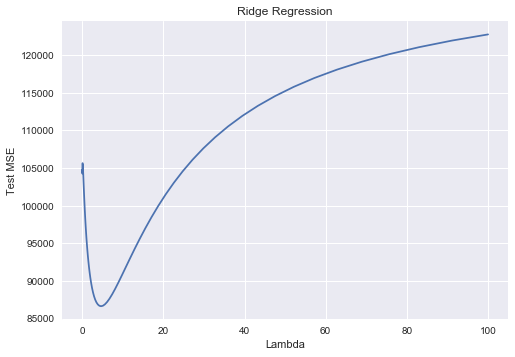

In [159]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 2, 100) # in sklearn the tuning parameter is alpha instead of lambda
X_train, X_test, y_train, y_test = train_test_split(hitters[numeric_features], hitters['Salary'], test_size=0.15)
errors = []

for alpha in alphas:
    model = Ridge(alpha=alpha, normalize=True).fit(X_train, y_train)
    error = mean_squared_error(y_test, model.predict(X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Ridge Regression')
plt.show()

In [160]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

4.641588833612782

In [162]:
model = Ridge(alpha=best_alpha, normalize=True).fit(hitters[numeric_features], hitters['Salary'])
model.coef_

array([ 0.09855867,  0.42237128,  1.24608665,  0.67074008,  0.65936711,
        0.87869038,  2.64799899,  0.00837553,  0.03268843,  0.2410394 ,
        0.06563754,  0.06773662,  0.06414376,  0.06269764,  0.00901082,
       -0.19403587])

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


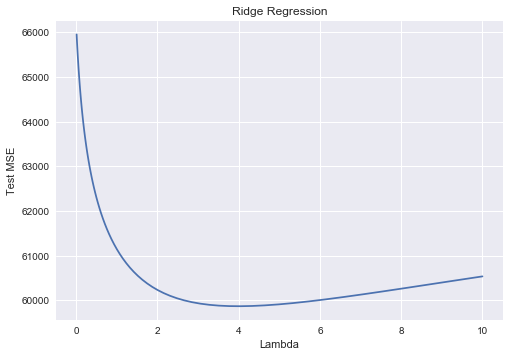

In [173]:
# Let's try standardizing the data instead of normalizing it
# The test errors vary wildly so it's hard to say whether standardizing or normalizing is better
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(hitters[numeric_features])
X_train, X_test, y_train, y_test = train_test_split(scaled_X, hitters['Salary'], test_size=0.15)
alphas = np.logspace(-2, 1, 100) # in sklearn the tuning parameter is alpha instead of lambda
errors = []

for alpha in alphas:
    model = Ridge(alpha=alpha).fit(X_train, y_train)
    error = mean_squared_error(y_test, model.predict(X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Ridge Regression')
plt.show()

In [170]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.20092330025650468

### Lasso

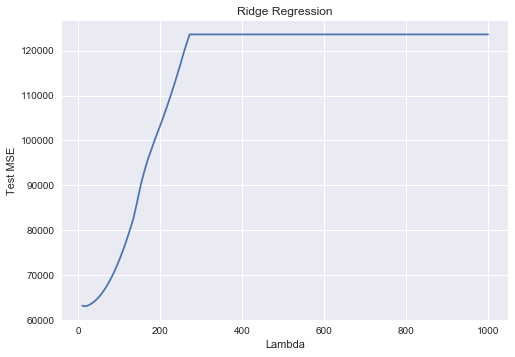

In [178]:
from sklearn.linear_model import Lasso

alphas = np.logspace(1, 3, 100) # in sklearn the tuning parameter is alpha instead of lambda
errors = []

for alpha in alphas:
    model = Lasso(alpha=alpha).fit(X_train, y_train)
    error = mean_squared_error(y_test, model.predict(X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Lasso')
plt.show()

In [179]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

17.47528400007684

In [180]:
# The lasso chose 6 variables
model = Lasso(alpha=best_alpha).fit(scaled_X, hitters['Salary'])
model.coef_

array([ -0.        ,  86.91507705,   0.        ,   0.        ,
         0.        ,  49.10723714,  -0.        ,   0.        ,
         0.        ,   2.73758915,  80.38420138, 118.94776878,
         0.        ,  61.62848143,  -0.        ,  -0.        ])

## Principal Components Regression

In [182]:
# We'll use scaled_X since PCA assumes standardized variables

from sklearn.decomposition import PCA

pca = PCA(n_components='mle')
pca_X = pca.fit_transform(scaled_X)

# Only reduced it by one feature!
pca.n_components_

15

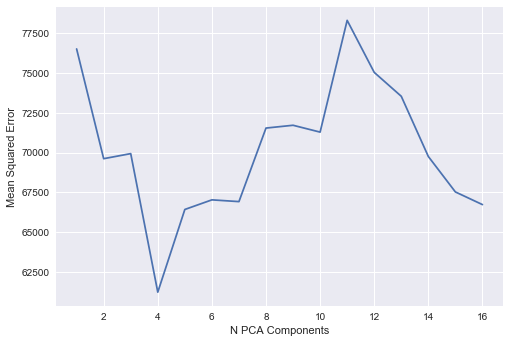

In [193]:
# Let's plot the cross-val score for a range of n_components

ns = range(1, scaled_X.shape[1] + 1)

errors = []
X_train, X_test, y_train, y_test = train_test_split(scaled_X, hitters['Salary'], test_size=0.10)

for n in ns:
    pca = PCA(n_components=n)
    pca_X_train = pca.fit_transform(X_train)
    model = LinearRegression().fit(pca_X_train, y_train)
    pca_X_test = pca.fit_transform(X_test)
    error = mean_squared_error(y_test, model.predict(pca_X_test))
    errors.append(error)

plt.plot(ns, errors)
plt.xlabel('N PCA Components')
plt.ylabel('Mean Squared Error')
plt.show()

# It looks like n = 4 is best, but the graph is very variable 

# Exercises: Conceptual

1. We perform best subset, forward stepwise, and backward stepwise on a single data set. For each approach, we obtain $p + 1$ models containing $0, 1, ..., p$ predictors. 
  1. Which of the three models with k predictors has the smallest training RSS?
  2. Which of the three models with k predictors has the smallest test RSS?
  3. True or False
    1. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the $(k+1)$ variable model identified by forward stepwise selection. 
    2. The predictors in the k-variable model identifed by backward stepwise selection are a subset of the predictors in the $(k+1)$-variable model identified by backward stepwise selection
    3. The predictors in the k-variable model identifed by backward stepwise selection are a subset of the predictors in the $(k+1)$-variable model identified by forward stepwise selection
    4. The predictors in the k-variable model identifed by forward stepwise selection are a subset of the predictors in the $(k+1)$-variable model identified by backward stepwise selection
    5. The predictors in the k-variable model identifed by best subset selection are a subset of the predictors in the $(k+1)$-variable model identified by best subset selection
2. For parts A-C, indicate which is correct
  1. The lasso, relative to least squares, is:
    1. More flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance
    2. More flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias
    3. Less flexible and hence will give improved prediction accuracy when its increase in bias is less than its decrease in variance
    4. Less flexible and hence will give improved prediction accuracy when its increase in variance is less than its decrease in bias
  2. Repeat for ridge regression relative to least squares
  3. Repeat for non-linear methods relative to least squares
3. Suppose we estimate the regression coefficients in a linear regression model by minimizing:
   $$ \sum_{i=1}^n \bigg(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij} \bigg)^2 $$ 
   subject to $\sum_{j=1}^p |\beta_j| \le s$ for a particular value of s. For parts A-E, indicate which is correct. 
  1. As we increase s from 0, the training RSS will:
    1. Increase initially and then eventually start decreasing in an inverted U shape
    2. Decrease initially and then eventually start increasing in a U shape
    3. Steadily increase
    4. Steadily decrease
    5. Remain constant
  2. Repeat for test RSS
  3. Repeat for variance
  4. Repeat for squared bias
  5. Repeat for the irreducible error
4. Suppose we estimate the regression coefficients in a linear regression model by minimizing:
   $$ \sum_{i=1}^n \bigg(y_i - \beta_0 - \sum_{j=1}^p \beta_jx_{ij} \bigg)^2 + \lambda \sum_{j=1}^p \beta_j^2$$ 
   For parts A-E, indicate which is correct. 
  1. As we increase $\lambda$ from 0, the training RSS will:
    1. Increase initially and then eventually start decreasing in an inverted U shape
    2. Decrease initially and then eventually start increasing in a U shape
    3. Steadily increase
    4. Steadily decrease
    5. Remain constant
  2. Repeat for test RSS
  3. Repeat for variance
  4. Repeat for squared bias
  5. Repeat for the irreducible error

## Answers
1. 
  1. Best subset model should have smallest training RSS since it checks every possible combination of predictors
  2. Best subset model would have the smallest cross-validation error, but it's unknown if it would perform better in practice
  3. 
    1. True
    2. True
    3. False, it's not guaranteed to be the same
    4. False
    5. False, best subset checks all of the possible combinations so it's possible the predictors in the k-variable model are not in the k+1 model
2. 
  1. C
  2. C
  3. B
3. $ s = 0 $ means all of the coefficients are 0, and as s increases it approaches the normal least squares regression
  1. D
  2. B - assuming that some of the variables actually aren't relevant. The normal least squares regression will overfit the data, so the ideal s will perform the proper feature selection
  3. C
  4. D
  5. E
4. When $ \lambda = 0 $, it's the same as normal least squares regression. As $\lambda$ increases, there is increasing penalty for having more features, so it approaches the null model where all coefficients are equal to 0
  1. C
  2. B - it will initially decrease as some of the overfitting will be mitigated, but then it will increase again as it approaches the null model and becomes overly biased
  3. D
  4. C
  5. E

# Exercises: Applied

## Simulated Data

1. 
  1. Generate predictor data using the following commands:
     ```
     x = np.random.randn(100)
     e = np.random.randn(100)
     ```
  2. Generate a response vector Y of length 100 using the following model: $ Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$, where the coefficients are constants of your choice
  3. Perform best subset selection to choose the best model containing the predictors $X, X^2, ..., X^{10}$. What is the best model obtained according to $C_p, BIC$ and adjusted $R^2$? Show some plots to provide evidence of your answer
  4. Repeat c) using forward stepwise selection and backward stepwise selection. How does your answer compare?
  5. Now fit a lasso model to the simulated data, again using $X, X^2, ..., X^{10}$. Use cross-validation to select the optimal value of $\lambda$. Report the resulting coefficient estimates
  6. Now generate a response vector Y according to the model $ Y = \beta_0 + \beta_7X^7 + \epsilon$ and perform best subset and lasso. Discuss the results obtained

In [231]:
# simulated data
x = np.random.randn(100)
e = np.random.randn(100)
beta_0, beta_1, beta_2, beta_3 = -5, 1, 4, 3
y = beta_0 + beta_1*x + beta_2*x**2 + beta_3*x**3 + e

In [232]:
X = pd.DataFrame({'x1': x, 'x2': x**2, 'x3': x**3, 'x4': x**4, 'x5': x**5, 'x6': x**6, 'x7': x**7, 'x8': x**8, 'x9': x**9, 'x10': x**10})
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,-0.40,0.16,-0.06,0.02,-0.01,0.00,-0.00,0.00,-0.00,0.00
1,0.55,0.31,0.17,0.09,0.05,0.03,0.02,0.01,0.00,0.00
2,-0.59,0.34,-0.20,0.12,-0.07,0.04,-0.02,0.01,-0.01,0.00
3,-1.17,1.38,-1.62,1.90,-2.23,2.62,-3.07,3.61,-4.23,4.97
4,-0.20,0.04,-0.01,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00


### Best Subset Selection

In [12]:
# Modified from the lab function to include more metrics
def best_subset_selection(X, y, test_size=0.25, metric='Test Score'):
    # The parameter metric lets you choose how the resulting data frame is sorted
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    results_df = pd.DataFrame([], columns=['Number of Features', 'Features', 'RSS', 'Test Score', 'Cp', 'BIC', 'R2'])
    # Null Model
    y_pred = np.repeat(np.mean(y), len(y))
    RSS = mean_squared_error(y, y_pred) * len(y)
    TSS = np.sum((y - np.mean(y))**2)
    test_score = mean_squared_error(y_test, np.repeat(np.mean(y_train), len(y_test)))
    results_df = results_df.append({
        'Number of Features': 0,
        'Features': [],
        'RSS': RSS,
        'Cp': (1/len(X)) * RSS,
        'BIC': (1/len(X)) * RSS,
        'R2': 1 - (RSS/TSS),
        'Test Score': test_score
    }, ignore_index=True)
    # Find the best model for k = 1, ..., p
    for k in range(1, X.shape[1] + 1):
        best_RSS = np.inf
        for combo in combinations(X.columns, k):
            X_temp = X[list(combo)]
            model_k = LinearRegression().fit(X_temp, y)
            RSS = mean_squared_error(y, model_k.predict(X_temp)) * len(y)
            if RSS < best_RSS:
                best_RSS = RSS
                best_features = combo
                best_model_k = model_k
        sigma2 = np.sum((best_model_k.predict(X[list(best_features)]) - y)**2) / len(X)
        TSS = np.sum((y - np.mean(y))**2)
        Cp = (1/len(X)) * (RSS + 2*k*sigma2)
        BIC = (1/len(X)) * (RSS + np.log(len(X))*k*sigma2)
        R2 = 1 - ((RSS/(len(X)-k-1)) / (TSS/(len(X)-1)))
        # Obtain the cross-validation test score of the best model for this k
        best_model_k_cv = LinearRegression().fit(X_train[list(best_features)], y_train)
        test_score = mean_squared_error(y_test, best_model_k_cv.predict(X_test[list(best_features)]))
        results_df = results_df.append({
            'Number of Features': k,
            'Features': list(best_features),
            'RSS': best_RSS,
            'Cp': Cp,
            'BIC': BIC,
            'R2': R2,
            'Test Score': test_score
        }, ignore_index=True)
    if metric == 'R2':
        ascending = False
    else:
        ascending = True
    return results_df.sort_values(by=[metric], ascending=ascending).reset_index(drop=True)

In [234]:
results = best_subset_selection(X, y, metric='Cp')

In [235]:
results

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
0,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.03,1.32,1.61,0.99
1,9,"[x1, x2, x3, x4, x5, x6, x7, x8, x10]",109.94,0.78,1.32,1.58,0.99
2,8,"[x1, x2, x3, x4, x6, x8, x9, x10]",110.27,0.75,1.47,1.70,0.99
3,7,"[x1, x2, x3, x4, x6, x8, x10]",110.64,0.76,1.73,1.93,0.98
4,6,"[x1, x2, x3, x5, x7, x9]",111.55,0.70,2.72,2.89,0.97
5,5,"[x1, x2, x3, x8, x10]",111.79,0.68,4.95,5.09,0.95
6,4,"[x1, x2, x3, x4]",112.19,0.67,10.98,11.10,0.89
7,3,"[x1, x2, x3]",112.29,0.67,17.47,17.56,0.82
8,2,"[x2, x3]",131.78,0.82,38.33,38.40,0.62
9,1,[x3],1729.29,18.14,52.31,52.76,0.49


In [236]:
results.sort_values(by=['BIC'], ascending=True)

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
1,9,"[x1, x2, x3, x4, x5, x6, x7, x8, x10]",109.94,0.78,1.32,1.58,0.99
0,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.03,1.32,1.61,0.99
2,8,"[x1, x2, x3, x4, x6, x8, x9, x10]",110.27,0.75,1.47,1.70,0.99
3,7,"[x1, x2, x3, x4, x6, x8, x10]",110.64,0.76,1.73,1.93,0.98
4,6,"[x1, x2, x3, x5, x7, x9]",111.55,0.70,2.72,2.89,0.97
5,5,"[x1, x2, x3, x8, x10]",111.79,0.68,4.95,5.09,0.95
6,4,"[x1, x2, x3, x4]",112.19,0.67,10.98,11.10,0.89
7,3,"[x1, x2, x3]",112.29,0.67,17.47,17.56,0.82
8,2,"[x2, x3]",131.78,0.82,38.33,38.40,0.62
9,1,[x3],1729.29,18.14,52.31,52.76,0.49


In [237]:
results.sort_values(by=['R2'], ascending=False)

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
0,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.03,1.32,1.61,0.99
1,9,"[x1, x2, x3, x4, x5, x6, x7, x8, x10]",109.94,0.78,1.32,1.58,0.99
2,8,"[x1, x2, x3, x4, x6, x8, x9, x10]",110.27,0.75,1.47,1.70,0.99
3,7,"[x1, x2, x3, x4, x6, x8, x10]",110.64,0.76,1.73,1.93,0.98
4,6,"[x1, x2, x3, x5, x7, x9]",111.55,0.70,2.72,2.89,0.97
5,5,"[x1, x2, x3, x8, x10]",111.79,0.68,4.95,5.09,0.95
6,4,"[x1, x2, x3, x4]",112.19,0.67,10.98,11.10,0.89
7,3,"[x1, x2, x3]",112.29,0.67,17.47,17.56,0.82
8,2,"[x2, x3]",131.78,0.82,38.33,38.40,0.62
9,1,[x3],1729.29,18.14,52.31,52.76,0.49


In [238]:
# BIC and Cp and R2 seem vulnerable to overfitting
# Using the test score got us closer to the actual answer
results.sort_values(by=['Test Score'], ascending=True)

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
6,4,"[x1, x2, x3, x4]",112.19,0.67,10.98,11.10,0.89
7,3,"[x1, x2, x3]",112.29,0.67,17.47,17.56,0.82
5,5,"[x1, x2, x3, x8, x10]",111.79,0.68,4.95,5.09,0.95
4,6,"[x1, x2, x3, x5, x7, x9]",111.55,0.70,2.72,2.89,0.97
2,8,"[x1, x2, x3, x4, x6, x8, x9, x10]",110.27,0.75,1.47,1.70,0.99
3,7,"[x1, x2, x3, x4, x6, x8, x10]",110.64,0.76,1.73,1.93,0.98
1,9,"[x1, x2, x3, x4, x5, x6, x7, x8, x10]",109.94,0.78,1.32,1.58,0.99
8,2,"[x2, x3]",131.78,0.82,38.33,38.40,0.62
0,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.03,1.32,1.61,0.99
9,1,[x3],1729.29,18.14,52.31,52.76,0.49


In [241]:
# Let's check the coefficients
# The coefficients are very close!

model = LinearRegression().fit(X[['x1', 'x2', 'x3']], y)
print(model.intercept_)
print(model.coef_)

-4.906006397875104
[0.90419372 4.02568849 3.05362219]


In [242]:
# What if we had included x4
# the coefficient for x4 is very small 

model = LinearRegression().fit(X[['x1', 'x2', 'x3', 'x4']], y)
print(model.intercept_)
print(model.coef_)

-4.929703108243377
[ 0.8790635   4.10258209  3.07006121 -0.02280216]


In [243]:
# the coefficients for x8 and x10 are also very small
model = LinearRegression().fit(X[['x1', 'x2', 'x3', 'x8', 'x10']], y)
print(model.intercept_)
print(model.coef_)

-4.947167298515727
[ 9.07013863e-01  4.13501998e+00  3.05404898e+00 -8.74856301e-03
  1.50051825e-03]


In [244]:
# what about the full model
# the coefficients are pretty off
model = LinearRegression().fit(X, y)
print(model.intercept_)
print(model.coef_)

-5.041797021804488
[ 1.13570525  5.43895937  2.11285247 -2.52047836  0.84246175  1.62567069
 -0.24178977 -0.41472512  0.02094513  0.03547815]


### Forward Selection

In [262]:
# Forward Selection Amended

def forward_selection(X, y, test_size=0.25, metric='Test Score'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    results_df = pd.DataFrame([], columns=['Number of Features', 'Features', 'RSS', 'Cp', 'BIC', 'R2', 'Test Score'])
    all_features = set(X.columns)
    model_features = set({}) 
    
    # Null Model
    y_pred = np.repeat(np.mean(y), len(y))
    RSS = mean_squared_error(y, y_pred) * len(y)
    TSS = np.sum((y - np.mean(y))**2)
    test_score = mean_squared_error(y_test, np.repeat(np.mean(y_train), len(y_test)))
    results_df = results_df.append({
        'Number of Features': 0,
        'Features': model_features,
        'RSS': RSS,
        'Cp': (1/len(X)) * RSS,
        'BIC': (1/len(X)) * RSS,
        'R2': 1 - (RSS/TSS),
        'Test Score': test_score
    }, ignore_index=True)
    
    # for k = 0, ..., p-1
    for k in range(0, X.shape[1]):
        feature_candidates = all_features - model_features
        best_RSS = np.inf
        for f in feature_candidates:
            temp_features = model_features.copy()
            temp_features.add(f)
            X_temp = X[list(temp_features)]
            model = LinearRegression().fit(X_temp, y)
            RSS = mean_squared_error(y, model.predict(X_temp)) * len(y)
            if RSS < best_RSS:
                best_RSS = RSS
                new_model_features = temp_features
                best_model = model
        sigma2 = np.sum((best_model.predict(X[list(new_model_features)]) - y)**2) / len(X)
        TSS = np.sum((y - np.mean(y))**2)
        Cp = (1/len(X)) * (RSS + 2*(k+1)*sigma2)
        BIC = (1/len(X)) * (RSS + np.log(len(X))*(k+1)*sigma2)
        R2 = 1 - ((RSS/(len(X)-(k+1)-1)) / (TSS/(len(X)-1)))
        # Obtain the cross-validation test score of the best model for this k
        best_model_cv = LinearRegression().fit(X_train[list(new_model_features)], y_train)
        test_score = mean_squared_error(y_test, best_model_cv.predict(X_test[list(new_model_features)]))
        results_df = results_df.append({
            'Number of Features': k+1,
            'Features': list(new_model_features),
            'RSS': best_RSS,
            'Cp': Cp,
            'BIC': BIC,
            'R2': R2,
            'Test Score': test_score
        }, ignore_index=True)
        model_features = new_model_features
    if metric == 'R2':
        ascending = False
    else:
        ascending = True
    return results_df.sort_values(by=[metric], ascending=ascending).reset_index(drop=True)

In [263]:
results = forward_selection(X, y)
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,3,"[x2, x1, x3]",112.29,1.33,1.42,0.99,0.58
1,4,"[x2, x1, x3, x4]",112.19,1.21,1.33,0.99,0.60
2,2,"[x2, x3]",131.78,15.25,15.32,0.85,1.01
3,5,"[x10, x4, x3, x2, x1]",111.86,1.23,1.38,0.99,21.16
4,1,[x3],1729.29,39.36,39.81,0.62,26.94
5,10,"[x10, x4, x8, x3, x6, x2, x1, x5, x7, x9]",109.90,1.32,1.61,0.99,210.45
6,6,"[x2, x1, x10, x4, x8, x3]",111.78,1.25,1.43,0.99,211.78
7,0,{},10245.71,102.46,102.46,0.00,212.49
8,9,"[x10, x4, x8, x3, x6, x2, x1, x5, x9]",109.99,1.30,1.56,0.99,397.19
9,7,"[x2, x1, x10, x4, x8, x3, x6]",110.64,1.26,1.46,0.99,564.04


In [264]:
results = forward_selection(X, y, metric='Cp')
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,4,"[x2, x1, x3, x4]",112.19,1.21,1.33,0.99,1.76
1,5,"[x10, x4, x3, x2, x1]",111.86,1.23,1.38,0.99,2.75
2,6,"[x2, x1, x10, x4, x8, x3]",111.78,1.25,1.43,0.99,7.39
3,7,"[x2, x1, x10, x4, x8, x3, x6]",110.64,1.26,1.46,0.99,199.54
4,8,"[x2, x1, x10, x4, x9, x8, x3, x6]",110.27,1.28,1.51,0.99,197.12
5,9,"[x10, x4, x8, x3, x6, x2, x1, x5, x9]",109.99,1.30,1.56,0.99,190.32
6,10,"[x10, x4, x8, x3, x6, x2, x1, x5, x7, x9]",109.90,1.32,1.61,0.99,155.80
7,3,"[x2, x1, x3]",112.29,1.33,1.42,0.99,1.63
8,2,"[x2, x3]",131.78,15.25,15.32,0.85,1.31
9,1,[x3],1729.29,39.36,39.81,0.62,31.64


In [266]:
results = forward_selection(X, y, metric='BIC')
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,4,"[x2, x1, x3, x4]",112.19,1.21,1.33,0.99,1.52
1,5,"[x10, x4, x3, x2, x1]",111.86,1.23,1.38,0.99,1.52
2,3,"[x2, x1, x3]",112.29,1.33,1.42,0.99,1.49
3,6,"[x2, x1, x10, x4, x8, x3]",111.78,1.25,1.43,0.99,1.54
4,7,"[x2, x1, x10, x4, x8, x3, x6]",110.64,1.26,1.46,0.99,1.50
5,8,"[x2, x1, x10, x4, x9, x8, x3, x6]",110.27,1.28,1.51,0.99,4.07
6,9,"[x10, x4, x8, x3, x6, x2, x1, x5, x9]",109.99,1.30,1.56,0.99,11.22
7,10,"[x10, x4, x8, x3, x6, x2, x1, x5, x7, x9]",109.90,1.32,1.61,0.99,14.23
8,2,"[x2, x3]",131.78,15.25,15.32,0.85,1.78
9,1,[x3],1729.29,39.36,39.81,0.62,31.97


In [267]:
# BIC, R2, and Cp choose x1, x2, x3, x4, tho x1, x2, x3 tend to have the lowest test errors
results = forward_selection(X, y, metric='R2')
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,4,"[x2, x1, x3, x4]",112.19,1.21,1.33,0.99,1.26
1,5,"[x10, x4, x3, x2, x1]",111.86,1.23,1.38,0.99,1.31
2,6,"[x2, x1, x10, x4, x8, x3]",111.78,1.25,1.43,0.99,1.32
3,7,"[x2, x1, x10, x4, x8, x3, x6]",110.64,1.26,1.46,0.99,1.79
4,8,"[x2, x1, x10, x4, x9, x8, x3, x6]",110.27,1.28,1.51,0.99,2.02
5,9,"[x10, x4, x8, x3, x6, x2, x1, x5, x9]",109.99,1.30,1.56,0.99,2.03
6,10,"[x10, x4, x8, x3, x6, x2, x1, x5, x7, x9]",109.90,1.32,1.61,0.99,2.07
7,3,"[x2, x1, x3]",112.29,1.33,1.42,0.99,1.25
8,2,"[x2, x3]",131.78,15.25,15.32,0.85,1.60
9,1,[x3],1729.29,39.36,39.81,0.62,17.74


### Backward Selection

In [273]:
def backward_selection(X, y, test_size=0.25, metric='Test Score'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    results_df = pd.DataFrame([], columns=['Number of Features', 'Features', 'RSS', 'Cp', 'BIC', 'R2', 'Test Score'])
    all_features = set(X.columns)
    
    # Full Model
    model = LinearRegression().fit(X, y)
    current_features = all_features
    RSS = mean_squared_error(y, model.predict(X)) * len(y)
    sigma2 = np.sum((model.predict(X) - y)**2) / len(X)
    TSS = np.sum((y - np.mean(y))**2)
    Cp = (1/len(X)) * (RSS + 2*(X.shape[1])*sigma2)
    BIC = (1/len(X)) * (RSS + np.log(len(X))*(X.shape[1])*sigma2)
    R2 = 1 - ((RSS/(len(X)-X.shape[1]-1)) / (TSS/(len(X)-1)))
    model = LinearRegression().fit(X_train, y_train)
    test_score = mean_squared_error(y_test, model.predict(X_test))
    results_df = results_df.append({
        'Number of Features': X.shape[1],
        'Features': current_features,
        'RSS': RSS,
        'Cp': Cp,
        'BIC': BIC,
        'R2': R2,
        'Test Score': test_score
    }, ignore_index=True)
    
    # for k = p, ..., 1
    for k in range(X.shape[1], 0, -1):
        if k == 1: # Null Model
            y_pred = np.repeat(np.mean(y), len(y))
            RSS = mean_squared_error(y, y_pred) * len(y)
            TSS = np.sum((y - np.mean(y))**2)
            test_score = mean_squared_error(y_test, np.repeat(np.mean(y_train), len(y_test)))
            results_df = results_df.append({
                'Number of Features': 0,
                'Features': set({}),
                'RSS': RSS,
                'Cp': (1/len(X)) * RSS,
                'BIC': (1/len(X)) * RSS,
                'R2': 1 - (RSS/TSS),
                'Test Score': test_score
            }, ignore_index=True) 
        else:
            removal_candidates = current_features
            best_RSS = np.inf
            for f in current_features:
                temp_features = current_features.copy()
                temp_features.remove(f)
                X_temp = X[list(temp_features)]
                model = LinearRegression().fit(X_temp, y)
                RSS = mean_squared_error(y, model.predict(X_temp)) * len(y)
                if RSS < best_RSS:
                    best_RSS = RSS
                    new_model_features = temp_features
                    best_model = model
            sigma2 = np.sum((best_model.predict(X[list(new_model_features)]) - y)**2) / len(X)
            TSS = np.sum((y - np.mean(y))**2)
            Cp = (1/len(X)) * (RSS + 2*(k-1)*sigma2)
            BIC = (1/len(X)) * (RSS + np.log(len(X))*(k-1)*sigma2)
            R2 = 1 - ((RSS/(len(X)-(k-1)-1)) / (TSS/(len(X)-1)))
            # Obtain the cross-validation test score of the best model for this k
            best_model_cv = LinearRegression().fit(X_train[list(new_model_features)], y_train)
            test_score = mean_squared_error(y_test, best_model_cv.predict(X_test[list(new_model_features)]))
            results_df = results_df.append({
                'Number of Features': k-1,
                'Features': new_model_features,
                'RSS': best_RSS,
                'Cp': Cp,
                'BIC': BIC,
                'R2': R2,
                'Test Score': test_score
            }, ignore_index=True)
            current_features = new_model_features
    if metric == 'R2':
        ascending = False
    else:
        ascending = True
    return results_df.sort_values(by=[metric], ascending=ascending).reset_index(drop=True)
            

In [274]:
results = backward_selection(X, y)
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,3,"{x2, x1, x3}",112.29,10.41,10.49,0.90,1.65
1,2,"{x2, x3}",131.78,15.41,15.48,0.85,1.76
2,4,"{x2, x1, x10, x3}",112.28,10.41,10.53,0.90,2.79
3,5,"{x2, x1, x10, x8, x3}",111.79,1.23,1.38,0.99,15.10
4,1,{x3},1729.29,60.94,61.39,0.40,15.95
5,0,{},10245.71,102.46,102.46,0.00,167.95
6,6,"{x2, x1, x10, x8, x3, x6}",111.71,1.40,1.58,0.99,210.10
7,7,"{x10, x4, x8, x3, x6, x2, x1}",110.64,1.26,1.46,0.99,465.10
8,9,"{x10, x4, x8, x3, x6, x2, x1, x5, x7}",109.94,1.30,1.56,0.99,579.18
9,8,"{x10, x4, x8, x3, x6, x2, x1, x7}",110.34,1.28,1.51,0.99,621.57


In [275]:
results = backward_selection(X, y, metric='Cp')
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,5,"{x2, x1, x10, x8, x3}",111.79,1.23,1.38,0.99,1.20
1,7,"{x10, x4, x8, x3, x6, x2, x1}",110.64,1.26,1.46,0.99,1.24
2,8,"{x10, x4, x8, x3, x6, x2, x1, x7}",110.34,1.28,1.51,0.99,1.24
3,9,"{x10, x4, x8, x3, x6, x2, x1, x5, x7}",109.94,1.30,1.56,0.99,1.24
4,10,"{x10, x4, x8, x3, x6, x2, x1, x5, x7, x9}",109.90,1.32,1.61,0.99,1.27
5,6,"{x2, x1, x10, x8, x3, x6}",111.71,1.40,1.58,0.99,1.23
6,3,"{x2, x1, x3}",112.29,10.41,10.49,0.90,1.04
7,4,"{x2, x1, x10, x3}",112.28,10.41,10.53,0.90,1.10
8,2,"{x2, x3}",131.78,15.41,15.48,0.85,1.39
9,1,{x3},1729.29,60.94,61.39,0.40,12.78


In [276]:
results = backward_selection(X, y, metric='BIC')
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,5,"{x2, x1, x10, x8, x3}",111.79,1.23,1.38,0.99,2.77
1,7,"{x10, x4, x8, x3, x6, x2, x1}",110.64,1.26,1.46,0.99,2.78
2,8,"{x10, x4, x8, x3, x6, x2, x1, x7}",110.34,1.28,1.51,0.99,3.25
3,9,"{x10, x4, x8, x3, x6, x2, x1, x5, x7}",109.94,1.30,1.56,0.99,4.05
4,6,"{x2, x1, x10, x8, x3, x6}",111.71,1.40,1.58,0.99,3.04
5,10,"{x10, x4, x8, x3, x6, x2, x1, x5, x7, x9}",109.90,1.32,1.61,0.99,4.57
6,3,"{x2, x1, x3}",112.29,10.41,10.49,0.90,1.07
7,4,"{x2, x1, x10, x3}",112.28,10.41,10.53,0.90,1.22
8,2,"{x2, x3}",131.78,15.41,15.48,0.85,1.01
9,1,{x3},1729.29,60.94,61.39,0.40,19.27


In [277]:
results = backward_selection(X, y, metric='R2')
results

,Number of Features,Features,RSS,Cp,BIC,R2,Test Score
0,5,"{x2, x1, x10, x8, x3}",111.79,1.23,1.38,0.99,0.86
1,7,"{x10, x4, x8, x3, x6, x2, x1}",110.64,1.26,1.46,0.99,0.91
2,8,"{x10, x4, x8, x3, x6, x2, x1, x7}",110.34,1.28,1.51,0.99,0.97
3,9,"{x10, x4, x8, x3, x6, x2, x1, x5, x7}",109.94,1.30,1.56,0.99,1.11
4,10,"{x10, x4, x8, x3, x6, x2, x1, x5, x7, x9}",109.90,1.32,1.61,0.99,1.11
5,6,"{x2, x1, x10, x8, x3, x6}",111.71,1.40,1.58,0.99,0.86
6,3,"{x2, x1, x3}",112.29,10.41,10.49,0.90,0.82
7,4,"{x2, x1, x10, x3}",112.28,10.41,10.53,0.90,0.83
8,2,"{x2, x3}",131.78,15.41,15.48,0.85,1.06
9,1,{x3},1729.29,60.94,61.39,0.40,15.54


In [ ]:
# Using Cp, BIC, R2, the algo chose {x1, x2, x3, x8, x10}
# but using the test error gives you the true set of variables

### Lasso

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


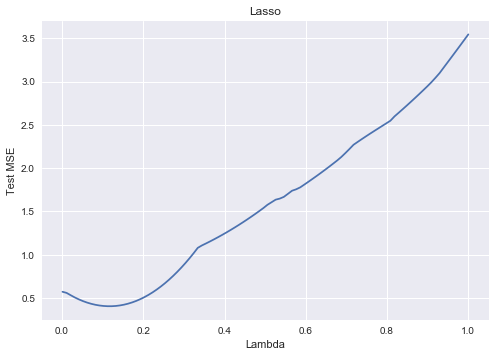

In [297]:
#alphas = np.logspace(-5, 5, 100) # in sklearn the tuning parameter is alpha instead of lambda
alphas = np.linspace(.001, 1, 100)
errors = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=100000, tol=.0001).fit(X_train, y_train)
    error = mean_squared_error(y_test, model.predict(X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Lasso')
plt.show()

In [298]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.112

In [302]:
# The Coefficients are a bit off
model = Lasso(alpha=best_alpha, max_iter=100000, tol=.0001).fit(X, y)
print(model.intercept_)
print(model.coef_)

-4.560049066803423
[ 6.92927280e-01  2.78698289e+00  2.98557577e+00  6.22117486e-01
  5.80379392e-02  0.00000000e+00  0.00000000e+00 -4.55438613e-02
 -1.63592989e-03  5.98369957e-03]


### New y

In [303]:
beta_7 = -1
y = beta_0 + beta_7*x**7 + e

In [304]:
# The best test score is similar among the top 4 options.
# If we implemented the one-standard-error rule, we'd choose the correct model x7
results = best_subset_selection(X, y)
results

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
0,6,"[x2, x4, x6, x7, x8, x10]",110.90,0.97,1.25,1.42,1.00
1,2,"[x1, x7]",112.36,0.98,32.49,32.55,0.98
2,1,[x7],112.41,0.98,484.78,484.80,0.77
3,3,"[x2, x4, x7]",112.16,0.99,11.74,11.83,0.99
4,7,"[x2, x4, x6, x7, x8, x9, x10]",110.43,1.05,1.27,1.47,1.00
5,8,"[x2, x3, x4, x5, x6, x7, x8, x10]",109.95,1.06,1.29,1.52,1.00
6,4,"[x3, x5, x7, x9]",111.74,1.07,1.21,1.33,1.00
7,5,"[x2, x3, x5, x7, x9]",111.63,1.07,1.23,1.37,1.00
8,9,"[x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.93,1.11,1.30,1.55,1.00
9,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.15,1.32,1.61,1.00


In [305]:
results.sort_values(by=['Cp'])

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
6,4,"[x3, x5, x7, x9]",111.74,1.07,1.21,1.33,1.00
7,5,"[x2, x3, x5, x7, x9]",111.63,1.07,1.23,1.37,1.00
0,6,"[x2, x4, x6, x7, x8, x10]",110.90,0.97,1.25,1.42,1.00
4,7,"[x2, x4, x6, x7, x8, x9, x10]",110.43,1.05,1.27,1.47,1.00
5,8,"[x2, x3, x4, x5, x6, x7, x8, x10]",109.95,1.06,1.29,1.52,1.00
8,9,"[x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.93,1.11,1.30,1.55,1.00
9,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.15,1.32,1.61,1.00
3,3,"[x2, x4, x7]",112.16,0.99,11.74,11.83,0.99
1,2,"[x1, x7]",112.36,0.98,32.49,32.55,0.98
2,1,[x7],112.41,0.98,484.78,484.80,0.77


In [307]:
results.sort_values(by=['BIC'])

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
6,4,"[x3, x5, x7, x9]",111.74,1.07,1.21,1.33,1.00
7,5,"[x2, x3, x5, x7, x9]",111.63,1.07,1.23,1.37,1.00
0,6,"[x2, x4, x6, x7, x8, x10]",110.90,0.97,1.25,1.42,1.00
4,7,"[x2, x4, x6, x7, x8, x9, x10]",110.43,1.05,1.27,1.47,1.00
5,8,"[x2, x3, x4, x5, x6, x7, x8, x10]",109.95,1.06,1.29,1.52,1.00
8,9,"[x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.93,1.11,1.30,1.55,1.00
9,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.15,1.32,1.61,1.00
3,3,"[x2, x4, x7]",112.16,0.99,11.74,11.83,0.99
1,2,"[x1, x7]",112.36,0.98,32.49,32.55,0.98
2,1,[x7],112.41,0.98,484.78,484.80,0.77


In [309]:
results.sort_values(by=['R2'], ascending=False)

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
6,4,"[x3, x5, x7, x9]",111.74,1.07,1.21,1.33,1.00
7,5,"[x2, x3, x5, x7, x9]",111.63,1.07,1.23,1.37,1.00
0,6,"[x2, x4, x6, x7, x8, x10]",110.90,0.97,1.25,1.42,1.00
4,7,"[x2, x4, x6, x7, x8, x9, x10]",110.43,1.05,1.27,1.47,1.00
5,8,"[x2, x3, x4, x5, x6, x7, x8, x10]",109.95,1.06,1.29,1.52,1.00
8,9,"[x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.93,1.11,1.30,1.55,1.00
9,10,"[x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]",109.90,1.15,1.32,1.61,1.00
3,3,"[x2, x4, x7]",112.16,0.99,11.74,11.83,0.99
1,2,"[x1, x7]",112.36,0.98,32.49,32.55,0.98
2,1,[x7],112.41,0.98,484.78,484.80,0.77


In [310]:
model = LinearRegression().fit(X[['x3', 'x5', 'x7', 'x9']], y)
print(model.intercept_)
print(model.coef_)

-4.875731467586938
[-0.51080638  0.56850666 -1.18044184  0.01739372]


In [311]:
model = LinearRegression().fit(X[['x7']], y)
print(model.intercept_)
print(model.coef_)

-4.889738698252085
[-0.99827035]


C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


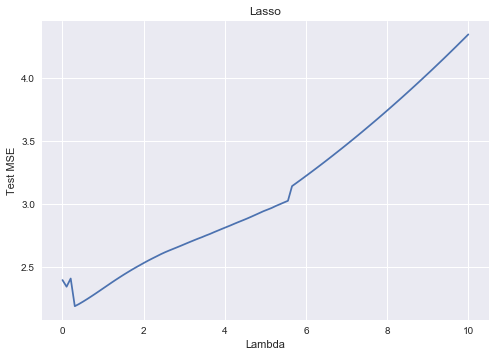

In [313]:
alphas = np.linspace(.001, 10, 100)
errors = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=100000, tol=.0001).fit(X_train, y_train)
    error = mean_squared_error(y_test, model.predict(X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Lasso')
plt.show()

In [315]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.30400000000000005

In [316]:
# The Lasso method chose x7, x8, x9, and x10, though x7 correctly has the most significant coefficient
model = Lasso(alpha=best_alpha, max_iter=100000, tol=.0001).fit(X, y)
print(model.intercept_)
print(model.coef_)

-4.89197173864159
[-0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -9.86101047e-01 -1.64690930e-03
 -3.01021528e-03  6.26884896e-04]


## College Data Set

1. We will predict the number of applications received using the other variables in the `College` data set
  1. Split the data into a training and test set
  2. Fit a linear model using least squares and report the test error
  3. Fit a ridge regression model and fit $\lambda$ using cross-validation. Report the test error
  4. Fit a lasso model on the training set with $\lambda$ chosen through cross-validation. Report the test error and the number of non-zero coefficients
  5. Fit a PCR model on the training set with the number of components chosen through cross-validation. Report the test error and the value of M chosen
  6. Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference in the test errors of these methods?

In [317]:
college = pd.read_csv('Data/college.csv')
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [319]:
predictors = [p for p in college.columns if p != 'Apps']
X = college[predictors]
y = college['Apps']

In [330]:
# Convert Private to a boolean
X['Private'] = (X['Private'] == 'Yes').astype('int')
X.head()

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Private,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.10,12,7041,60
Adelphi University,1,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.20,16,10527,56
Adrian College,1,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.90,30,8735,54
Agnes Scott College,1,349,137,60,89,510,63,12960,5450,450,875,92,97,7.70,37,19016,59
Alaska Pacific University,1,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.90,2,10922,15


In [320]:
X.shape

(777, 17)

In [363]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [364]:
linear_model = LinearRegression().fit(X_train, y_train)
mean_squared_error(y_test, linear_model.predict(X_test))

1143235.745378075

In [377]:
# For the rest of the methods, we need to standardize the data

scaler = StandardScaler().fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  """


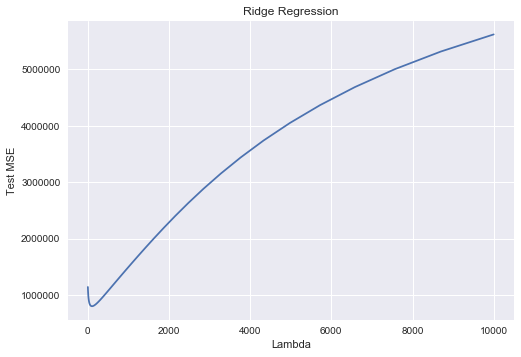

In [378]:
# Ridge Regression

alphas = np.logspace(-2, 4, 100) # in sklearn the tuning parameter is alpha instead of lambda
errors = []

for alpha in alphas:
    model = Ridge(alpha=alpha).fit(scaled_X_train, y_train)
    error = mean_squared_error(y_test, model.predict(scaled_X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Ridge Regression')
plt.show()

In [384]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

100.0

In [387]:
# This is lower than the linear regression model's test error
model = Ridge(alpha=best_alpha).fit(scaled_X_train, y_train)
mean_squared_error(y_test, model.predict(scaled_X_test))

802783.7668589661

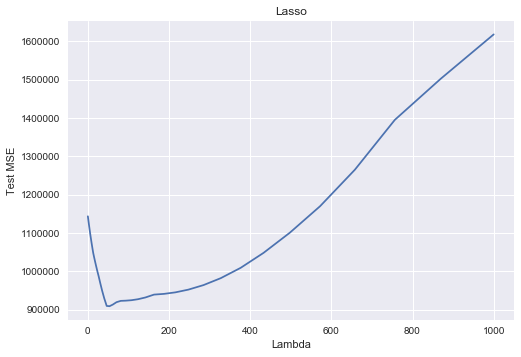

In [392]:
alphas = np.logspace(-3, 3, 100) # in sklearn the tuning parameter is alpha instead of lambda
errors = []

for alpha in alphas:
    model = Lasso(alpha=alpha).fit(scaled_X_train, y_train)
    error = mean_squared_error(y_test, model.predict(scaled_X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Lasso')
plt.show()

In [393]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

53.366992312063125

In [396]:
# Lower than linear regression, but higher than Ridge
model = Lasso(alpha=best_alpha).fit(scaled_X_train, y_train)
mean_squared_error(y_test, model.predict(scaled_X_test))

908696.7446104776

In [397]:
# 9 variables are non-zero
model.coef_

array([-128.39660706, 3433.77496459,   -0.        ,  464.28192825,
         -0.        ,   -0.        ,    0.        , -111.71340767,
         71.45016364,    0.        ,    0.        ,  -22.49132451,
        -30.22360258,    0.        ,   -0.        ,  320.18507078,
         36.88485464])

In [399]:
# non-zero variables
X.columns[np.where(model.coef_ != 0)]

Index(['Private', 'Accept', 'Top10perc', 'Outstate', 'Room.Board', 'PhD',
       'Terminal', 'Expend', 'Grad.Rate'],
      dtype='object')

In [400]:
# zero variables
X.columns[np.where(model.coef_ == 0)]

Index(['Enroll', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Books',
       'Personal', 'S.F.Ratio', 'perc.alumni'],
      dtype='object')

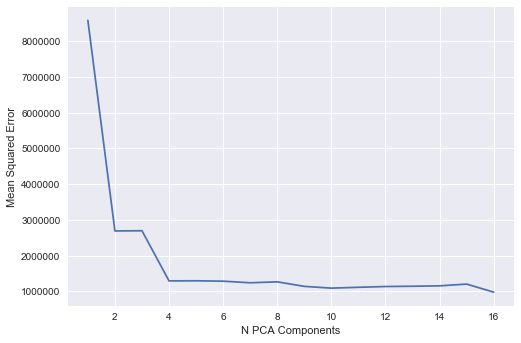

In [409]:
# PCR Model

# Let's plot the cross-val score for a range of n_components

ns = range(1, scaled_X.shape[1] + 1)

errors = []

for n in ns:
    pca = PCA(n_components=n).fit(scaled_X_train)
    pca_X_train = pca.transform(scaled_X_train)
    model = LinearRegression().fit(pca_X_train, y_train)
    pca_X_test = pca.transform(scaled_X_test)
    error = mean_squared_error(y_test, model.predict(pca_X_test))
    errors.append(error)

plt.plot(ns, errors)
plt.xlabel('N PCA Components')
plt.ylabel('Mean Squared Error')
plt.show()

In [410]:
best_n = ns[np.argmin(errors)]
best_n
# not much reduction here, but n = 10 is close to n = 16

16

In [411]:
# PCR is worse than Lasso and Ridge, but better than the linear model
pca = PCA(n_components = best_n).fit(scaled_X_train)
pca_X_train = pca.transform(scaled_X_train)
pca_X_test = pca.transform(scaled_X_test)
model = LinearRegression().fit(pca_X_train, y_train)
mean_squared_error(y_test, model.predict(pca_X_test))

978493.3327104682

In [412]:
pca = PCA(n_components = 10).fit(scaled_X_train)
pca_X_train = pca.transform(scaled_X_train)
pca_X_test = pca.transform(scaled_X_test)
model = LinearRegression().fit(pca_X_train, y_train)
mean_squared_error(y_test, model.predict(pca_X_test))

1091242.0858121074

The best mean squared error was approximately 802783, which means we can guess the number of applications within plus or minus ~900 (not gr8)

All of the models made an improvement over normal linear regression

## Simulated Data & Increasing Features

We will use simulated data to investigate the effect of increasing the number of features

1. Generate a data set with $p=20$ features, $n=1000$ observations and an associated quantitative response vector generated according to the model $Y = X\beta + \epsilon$, where $\beta$ has some elements that are exactly 0
2. Split your data into a test set of 100 observations and a training set of 900 observations
3. Perform best subset selection on the training set and plot the training set MSE associated with the best model of each size
4. Plot the test set MSE associated with the best model of each size
5. For which model size does the test set MSE take on its minimum value? 
6. How does the model at which the test set MSE is minimized compare to the true model used to generate the data? Comment on the coefficient values
7. Create a plot display $\sqrt{\sum_{j=1}^p(\beta_j - \hat{\beta}_j^r)^2}$ for a range of values of r, where $\hat{\beta}_j^r$ is the jth coefficient estimate for the best model containing r coefficients. Comment on what you observe. How does this compare to the test MSE plot from d? 

In [63]:
p = 20
n = 1000
X = np.random.randn(n, p)
beta = 2 * np.random.randn(p, 1) + 2
eps = np.random.randn(n, 1)

In [64]:
beta[3] = 0
beta[4] = 0
beta[9] = 0
beta[19] = 0
beta[10] = 0

In [65]:
beta

array([[-2.51635047],
       [ 3.19298228],
       [ 3.15552229],
       [ 0.        ],
       [ 0.        ],
       [ 0.52585053],
       [ 5.22254123],
       [-0.56222896],
       [ 3.33304085],
       [ 0.        ],
       [ 0.        ],
       [-0.06139176],
       [ 0.71883666],
       [ 0.32445265],
       [-0.86565316],
       [ 0.76631346],
       [ 0.82139505],
       [ 4.47627499],
       [ 0.75004722],
       [ 0.        ]])

In [66]:
y = np.dot(X, beta) + eps
y

array([[ 1.87611112e+01],
       [ 1.68925200e+01],
       [ 1.00664394e+00],
       [ 1.24509434e+01],
       [ 9.87598693e+00],
       [ 6.50845951e+00],
       [-7.73017674e+00],
       [-5.62922651e+00],
       [-1.14176171e+01],
       [ 2.06630057e+00],
       [ 1.23623200e+01],
       [ 2.52935821e+00],
       [-5.61213813e+00],
       [ 6.94689389e+00],
       [-1.78142495e+00],
       [-6.97134204e+00],
       [-3.05202972e+00],
       [-6.41949471e+00],
       [ 2.50821755e+01],
       [ 9.73771173e+00],
       [-6.76696407e-01],
       [ 2.01529698e+00],
       [ 1.47279013e+00],
       [ 5.53133393e+00],
       [-1.41768190e+01],
       [-6.28111421e+00],
       [ 7.34111124e+00],
       [-4.81839321e+00],
       [-1.41897231e+01],
       [-1.16397030e+01],
       [-4.33502601e+00],
       [ 6.12945181e+00],
       [ 1.38335494e+01],
       [ 2.84210531e+00],
       [ 1.74120091e+01],
       [-1.49616017e+01],
       [ 1.32202672e+00],
       [-1.34548662e+01],
       [ 7.7

In [69]:
X = pd.DataFrame(X)

In [113]:
results = best_subset_selection(X, y, test_size=0.10)
results

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
0,17,"[0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",960.044243,1.130724,28.293032,28.373131,0.667033
1,16,"[0, 1, 2, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 1...",961.066852,1.136281,28.336063,28.411530,0.666843
2,15,"[0, 1, 2, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, ...",962.119026,1.141642,28.341524,28.412352,0.667095
3,18,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",959.129913,1.146889,17.037118,17.121847,0.799470
4,20,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",958.234776,1.148730,0.996564,1.090620,0.988675
5,19,"[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",958.434237,1.149710,7.651711,7.741082,0.910093
6,14,"[0, 1, 2, 5, 6, 7, 8, 12, 13, 14, 15, 16, 17, 18]",968.981007,1.177711,28.732797,28.799375,0.662817
7,13,"[0, 1, 2, 5, 6, 7, 8, 12, 14, 15, 16, 17, 18]",1094.836146,1.240906,57.832794,57.902646,0.321706
8,12,"[0, 1, 2, 6, 7, 8, 12, 14, 15, 16, 17, 18]",1429.816803,1.603386,58.601480,58.685686,0.313451
9,11,"[0, 1, 2, 6, 8, 12, 14, 15, 16, 17, 18]",1756.451932,2.128791,68.212552,68.307374,0.201646


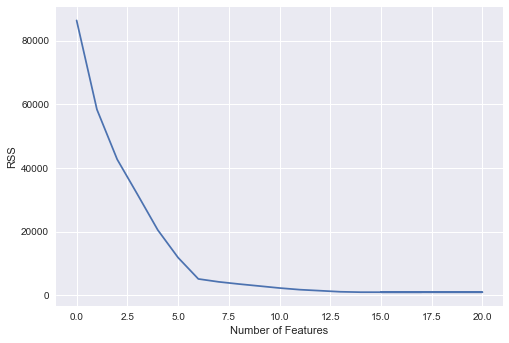

In [114]:
plt.plot(results['Number of Features'], results['RSS'])
plt.xlabel('Number of Features')
plt.ylabel('RSS')
plt.show()

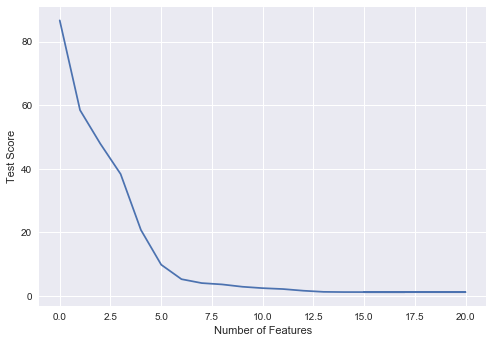

In [115]:
# They actually look pretty similar, but the minimum test score is at p = 17
# p = 13 to 20 are pretty similar in test score
plt.plot(results['Number of Features'], results['Test Score'])
plt.xlabel('Number of Features')
plt.ylabel('Test Score')
plt.show()

In [116]:
best_feature_set = results.sort_values(by=['Test Score']).iloc[0]['Features']

In [117]:
model = LinearRegression().fit(X[best_feature_set], y)
print(model.intercept_)
print(model.coef_)

[0.02654383]
[[-2.58350905  3.18408542  3.14413724  0.57208046  5.22496272 -0.57475011
   3.32000742 -0.03210868  0.03279419 -0.08192384  0.74988054  0.34808196
  -0.84036412  0.79895907  0.87219911  4.45049877  0.77453749]]


In [120]:
# some of the coefficients are quite off, but it could represent a linear combination of the real solution
beta

array([[-2.51635047],
       [ 3.19298228],
       [ 3.15552229],
       [ 0.        ],
       [ 0.        ],
       [ 0.52585053],
       [ 5.22254123],
       [-0.56222896],
       [ 3.33304085],
       [ 0.        ],
       [ 0.        ],
       [-0.06139176],
       [ 0.71883666],
       [ 0.32445265],
       [-0.86565316],
       [ 0.76631346],
       [ 0.82139505],
       [ 4.47627499],
       [ 0.75004722],
       [ 0.        ]])

In [118]:
# Comparing the difference in coefficient values
differences = []
sorted_results = results.sort_values(by=['Number of Features'])
for j in range(X.shape[1]):
    beta_estimate = np.zeros((X.shape[1], 1))
    if j == 0:
        d = np.sqrt(np.sum(beta**2))
        differences.append(d)
    else:
        features = sorted_results.iloc[j]['Features']
        model = LinearRegression().fit(X[features], y)
        for ind, f in enumerate(features):
            beta_estimate[f] = model.coef_[0, ind]
        d = np.sqrt(np.sum((beta - beta_estimate)**2))
        differences.append(d)

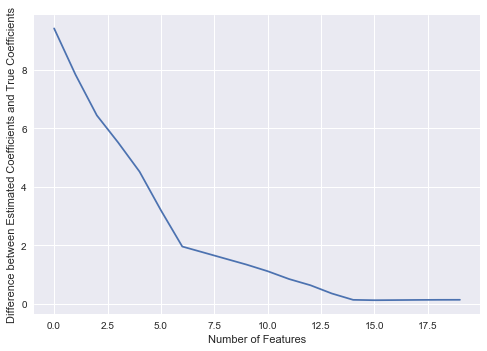

In [119]:
plt.plot(range(X.shape[1]), differences)
plt.xlabel('Number of Features')
plt.ylabel('Difference between Estimated Coefficients and True Coefficients')
plt.show()

## Boston Data Set

We will predict per capita crime rate in the `Boston` data set with our new techniques

1. Try out some of the regression methods explored in this chapter, such as best subset selection, the lasso, ridge regression, and PCR. Discuss your results
2. Propose a model (or set of models) that seem to perform well on this data set and justify your answer. 
3. Does your chosen model involve all of the features in the data set?

In [121]:
boston = pd.read_csv('Data/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [123]:
predictors = [p for p in boston.columns if p != 'crim']
X = boston[predictors]
y = boston['crim']

In [161]:
results = best_subset_selection(X, y, test_size=0.10)
results

,Number of Features,Features,RSS,Test Score,Cp,BIC,R2
0,2,"[rad, lstat]",21640.908632,20.221880,58.408323,59.122801,0.210444
1,4,"[zn, dis, rad, medv]",21166.670396,21.041904,54.073081,55.470723,0.270884
2,12,"[zn, indus, chas, nox, rm, dis, rad, tax, ptra...",20400.202941,21.756363,42.698078,46.739175,0.434204
3,11,"[zn, indus, nox, rm, dis, rad, tax, ptratio, b...",20416.739606,21.826687,42.628738,46.336080,0.434123
4,9,"[zn, indus, nox, dis, rad, ptratio, black, lst...",20458.575549,21.867304,42.848071,45.887566,0.429023
5,10,"[zn, indus, nox, rm, dis, rad, ptratio, black,...",20435.546191,21.932129,42.519156,45.892572,0.434597
6,13,"[zn, indus, chas, nox, rm, age, dis, rad, tax,...",20399.931010,22.159496,42.387646,46.765443,0.439584
7,8,"[zn, nox, dis, rad, ptratio, black, lstat, medv]",20532.561888,22.193228,42.804796,45.516341,0.428632
8,3,"[rad, black, lstat]",21348.884262,22.868528,54.735092,55.792348,0.261123
9,7,"[zn, nox, dis, rad, ptratio, black, medv]",20637.223498,23.031600,42.703767,45.088463,0.429042


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [172]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


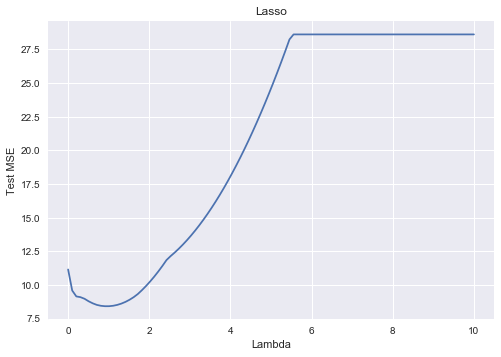

In [179]:
from sklearn.linear_model import Lasso
# The test MSE & optimal alpha is quite variable on each run, but this MSE is much lower 

alphas = np.linspace(.001, 10, 100)
errors = []

for alpha in alphas:
    model = Lasso(alpha=alpha, max_iter=100000, tol=.0001).fit(scaled_X_train, y_train)
    error = mean_squared_error(y_test, model.predict(scaled_X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Lasso')
plt.show()

In [180]:
best_alpha = alphas[np.argmin(errors)]
best_alpha

0.91

In [175]:
np.min(errors)

8.417920367862209

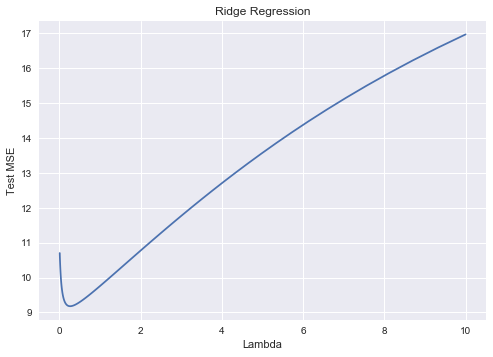

In [177]:
from sklearn.linear_model import Ridge

alphas = np.logspace(-2, 1, 100) # in sklearn the tuning parameter is alpha instead of lambda
errors = []

for alpha in alphas:
    model = Ridge(alpha=alpha, normalize=True).fit(scaled_X_train, y_train)
    error = mean_squared_error(y_test, model.predict(scaled_X_test))
    errors.append(error)

plt.plot(alphas, errors)
plt.xlabel('Lambda')
plt.ylabel('Test MSE')
plt.title('Ridge Regression')
plt.show()

In [178]:
# Ridge regression gave us a slightly lower test error
np.min(errors)

9.177918759360196

In [181]:
# The best model was Lasso
scaled_X = scaler.transform(X)
model = Lasso(alpha=0.91, max_iter=100000, tol=.0001).fit(X, y)

C:\Users\206493752\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [182]:
# And 7 features are non-zero
model.coef_

array([ 0.02274001, -0.        , -0.        , -0.        ,  0.        ,
        0.01246336, -0.        ,  0.4874447 , -0.00048771, -0.        ,
       -0.00950811,  0.12216381, -0.08541708])

In [195]:
# The features that are non-zero
for feature_ind in np.where(abs(model.coef_) > 0)[0]:
    print(predictors[feature_ind])

zn
age
rad
tax
black
lstat
medv
